##📌 Important Points
✔ Label Encoding assigns numbers alphabetically:

Blue = 0

Green = 1

Red = 2

✔ Use Label Encoding when:

Categories are not many

Algorithms require numerical input (XGBoost, Random Forest, LightGBM can handle it)

❌ Not recommended when:

There is no natural order

Encoding may create false ordinal relationship

For such cases → use One Hot Encoding

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'L'],
    'Price': [100, 150, 130, 120, 160]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

# Label Encoder object
le = LabelEncoder()

# Encoding Color column
df['Color_encoded'] = le.fit_transform(df['Color'])

# Encoding Size column
df['Size_encoded'] = le.fit_transform(df['Size'])   # S, M, L → 2,1,0 (alphabetical)

print("\nEncoded Dataset:\n", df)


Original Dataset:
    Color Size  Price
0    Red    S    100
1   Blue    M    150
2  Green    L    130
3   Blue    M    120
4    Red    L    160

Encoded Dataset:
    Color Size  Price  Color_encoded  Size_encoded
0    Red    S    100              2             2
1   Blue    M    150              0             1
2  Green    L    130              1             0
3   Blue    M    120              0             1
4    Red    L    160              2             0


In [1]:
import pandas as pd

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'L'],
    'Price': [100, 150, 130, 120, 160]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# One Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=['Color', 'Size'], drop_first=False)

print("\nOne Hot Encoded Data:\n", df_encoded)


Original Data:
    Color Size  Price
0    Red    S    100
1   Blue    M    150
2  Green    L    130
3   Blue    M    120
4    Red    L    160

One Hot Encoded Data:
    Price  Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0    100       False        False       True   False   False    True
1    150        True        False      False   False    True   False
2    130       False         True      False    True   False   False
3    120        True        False      False   False    True   False
4    160       False        False       True    True   False   False


In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)   # FIXED

encoded = encoder.fit_transform(df[['Color', 'Size']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color', 'Size']))

final_df = pd.concat([df, encoded_df], axis=1)
print(final_df)



   Color Size  Price  Color_Blue  Color_Green  Color_Red  Size_L  Size_M  \
0    Red    S    100         0.0          0.0        1.0     0.0     0.0   
1   Blue    M    150         1.0          0.0        0.0     0.0     1.0   
2  Green    L    130         0.0          1.0        0.0     1.0     0.0   
3   Blue    M    120         1.0          0.0        0.0     0.0     1.0   
4    Red    L    160         0.0          0.0        1.0     1.0     0.0   

   Size_S  
0     1.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


##✅ What is Feature Scaling?

Feature Scaling means transforming all numerical features to the same scale.

Why?
Because many ML algorithms work better when all features have similar ranges.

🎯 Why Feature Scaling is Important

Some algorithms calculate distance or use gradient descent:

Algorithms that NEED scaling:

Logistic Regression

Linear Regression

KNN

SVM

K-means

Neural Networks

PCA

Algorithms that DO NOT need scaling:

Decision Tree

Random Forest

XGBoost

✨ Two Most Common Scaling Methods
1️⃣ Standardization (Z-score Normalization)

Formula:

𝑋
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑋
−
mean
std
X
scaled
	​

=
std
X−mean
	​


Values become: mean = 0, std = 1

👉 Use when data has outliers.

2️⃣ Min-Max Scaling (Normalization)

Formula:

𝑋
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑋
−
𝑋
𝑚
𝑖
𝑛
𝑋
𝑚
𝑎
𝑥
−
𝑋
𝑚
𝑖
𝑛
X
scaled
	​

=
X
max
	​

−X
min
	​

X−X
min
	​

	​


Values become: 0 → 1

👉 Use when you want data in a fixed range (0–1).

In [8]:
import pandas as pd

data = {
    'Age': [20, 22, 25, 30, 35],
    'Salary': [30000, 35000, 40000, 50000, 60000]
}

df = pd.DataFrame(data)
print(df)


   Age  Salary
0   20   30000
1   22   35000
2   25   40000
3   30   50000
4   35   60000


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("\nStandard Scaled Data:\n", scaled_df)



Standard Scaled Data:
         Age    Salary
0 -1.171603 -1.207020
1 -0.805477 -0.742781
2 -0.256288 -0.278543
3  0.659027  0.649934
4  1.574342  1.578410


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("\nMin-Max Scaled Data:\n", scaled_df)



Min-Max Scaled Data:
         Age    Salary
0  0.000000  0.000000
1  0.133333  0.166667
2  0.333333  0.333333
3  0.666667  0.666667
4  1.000000  1.000000


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Sample Dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56],
    'Salary': [25000, 40000, 45000, 50000, 60000, 52000],
    'Purchased': [0, 0, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Features & Target
X = df[['Age', 'Salary']]
y = df['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


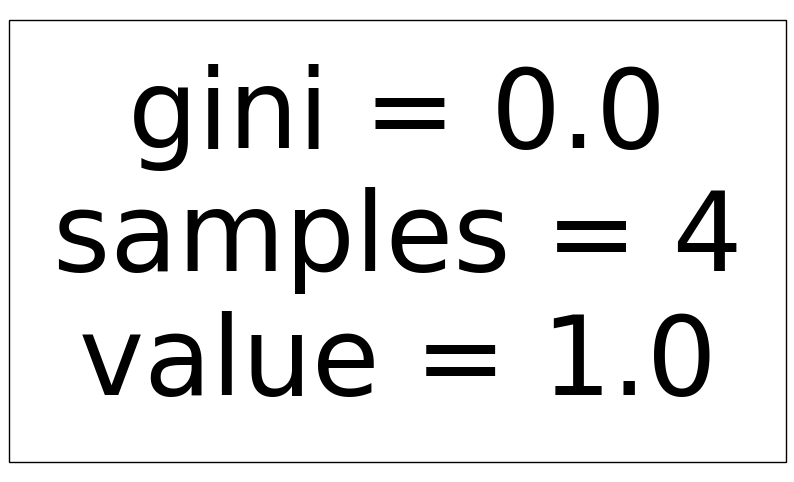

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['Age', 'Salary'], filled=True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training Data
X = [
    [7, 2],
    [8, 3],
    [9, 8],
    [10, 9]
]---
y = [0, 0, 1, 1]

# Create model
model = DecisionTreeClassifier()

# Train model
model.fit(X, y)

# User input
size = float(input("Enter the fruit size (m): "))
shade = float(input("Enter the fruit shade (1 to 10): "))

# Prediction
result = model.predict([[size, shade]])[0]

# Output
if result == 1:
    print("Fruit is: GOOD")
else:
    print("Fruit is: BAD")


Fruit is: BAD


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Training dataset
# Features: [size, shade]
X = [
    [7, 2],
    [8, 3],
    [9, 8],
    [10, 9]
]

# Target labels: 0 = Apple, 1 = Mango
y = [0, 0, 1, 1]

# Create model
model = DecisionTreeClassifier()

# Train the model
model.fit(X, y)

# Take input from user
size = float(input("Enter fruit size (in cm): "))
shade = float(input("Enter shade value (1–10): "))

# Make prediction
result = model.predict([[size, shade]])[0]

# Print result
if result == 0:
    print("Prediction: Apple")
else:
    print("Prediction: Mango")


Prediction: Mango


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Features: [weather, wind]
# weather: 0 = Sunny, 1 = Rainy
# wind: 0 = Weak, 1 = Strong
X = [
    [0, 0],   # Sunny, Weak
    [0, 1],   # Sunny, Strong
    [1, 0],   # Rainy, Weak
    [1, 1]    # Rainy, Strong
]

# Target: 1 = Play, 0 = Not Play
y = [1, 0, 1, 0]

# Create model
model = DecisionTreeClassifier()
model.fit(X, y)

# User input
weather = int(input("Weather (0=Sunny, 1=Rainy): "))
wind = int(input("Wind (0=Weak, 1=Strong): "))

result = model.predict([[weather, wind]])[0]

if result == 1:
    print("Decision: You can play outside!")
else:
    print("Decision: Do NOT play outside.")


Decision: Do NOT play outside.
